In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Riyadh car prices machine learning

Car Price Prediction is a really interesting machine learning problem as there are many factors that influence the price of a car in the second-hand market.

**This car dataset is scrapped from sa.opensooq.com a saudi second-hand market platform.**

**Riyadh** is the capital city of Saudi Arabia, Riyadh province comes in second to Makkah with 4.8 million registered vehicles accounting for 30 percent of the total vehicles registered.
The country’s traders paid SR356 billion to import cars over the past six years. The cost of imports rose 3 percent from SR77 billion in 2012 to SR79 billion last year, according to the study.

our end goal will be to predict the price of the car given its features to maximize the profit. 

|Feature|Type|Description
|---|---|---|
|city|object|City of car sale
|car_maker|object|Car brand name|
|model|object|Car name|
|year|int64|Production year of car|
|condition|int|Calsses. used, new|
|kilometers|object|Kilometers car traveled|
|transmission|object|Type of gear. automatic, manual|
|fuel|object|Gas or diesel|
|color|object|Car color|
|pay_method|object|Type of payment accepted|
|price|float64|Sale price of car|

In [25]:
df = pd.read_csv('./carsclean.csv')

In [26]:
df.head(5)

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [27]:
df.shape #Data frame has 560 rows

(560, 11)

In [28]:
df.dtypes #checking data types

city             object
car_maker        object
model            object
year              int64
condition        object
kilometers      float64
transmission     object
fuel             object
color            object
pay_method       object
price           float64
dtype: object

In [29]:
df.isnull().sum()
# Checking nulls

city            0
car_maker       0
model           0
year            0
condition       0
kilometers      0
transmission    0
fuel            0
color           0
pay_method      0
price           0
dtype: int64

In [30]:
print("precentage of nulls :",200/600)
# precentage of nulls

precentage of nulls : 0.3333333333333333


***We can see we have 200 rows in Price as NaN  which is 33% of the data***

In [31]:
df.car_maker.unique() #checking unique values in car_maker column 

array(['Toyota', 'Kia', 'Ford', 'Renault', 'Nissan', 'BMW', 'Cadillac',
       'Mazda', 'GMC', 'Dodge', 'Suzuki'], dtype=object)

In [32]:
df.price.describe() #looking into price data

count       560.000000
mean      37521.064286
std       27022.610673
min        2114.000000
25%       19000.000000
50%       27500.000000
75%       58375.000000
max      100000.000000
Name: price, dtype: float64

In [33]:
pricey = df[df.price == 100000]
pricey.count() #count of cars price = 100000

city            20
car_maker       20
model           20
year            20
condition       20
kilometers      20
transmission    20
fuel            20
color           20
pay_method      20
price           20
dtype: int64

In [34]:
df.price.value_counts()  #count of prices

10000.0     60
58375.0     60
22425.4     40
62500.0     40
11000.0     20
16000.0     20
45000.0     20
20000.0     20
25000.0     20
40000.0     20
42000.0     20
94000.0     20
100000.0    20
35000.0     20
36000.0     20
24000.0     20
98500.0     20
2114.0      20
30000.0     20
23000.0     20
12000.0     20
22000.0     20
Name: price, dtype: int64

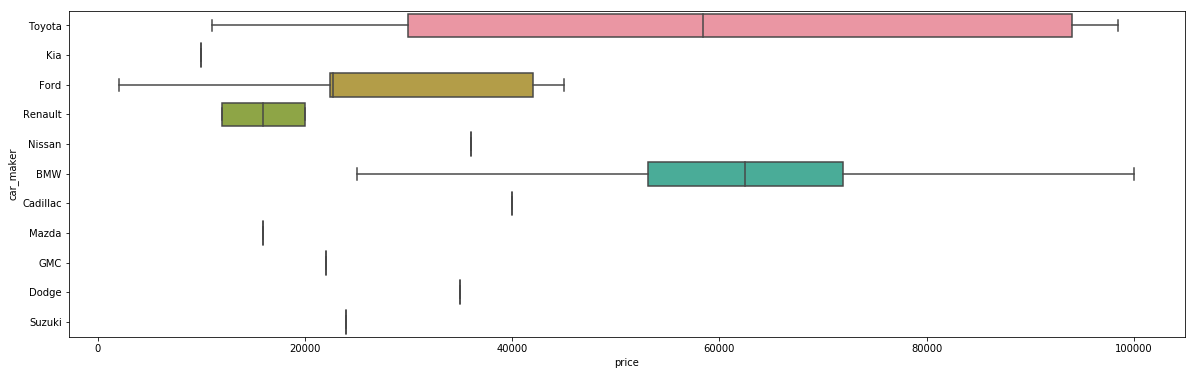

In [35]:
plt.figure(figsize= (20,6))
sns.boxplot(data = df , x = 'price' , y = 'car_maker', );
#price according to car maker box plot

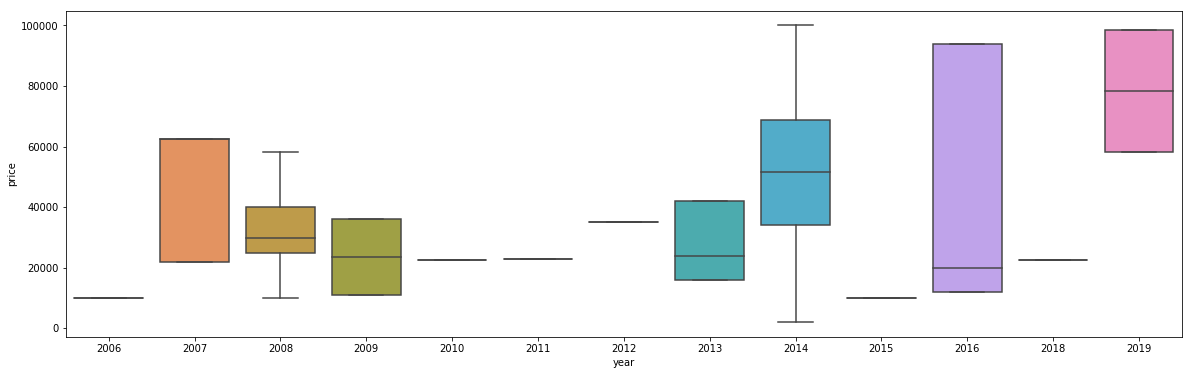

In [36]:
plt.figure(figsize= (20,6))
sns.boxplot(data = df , x = 'year' , y = 'price', );
#Price According to year boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05862b1fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f05861a0470>]], dtype=object)

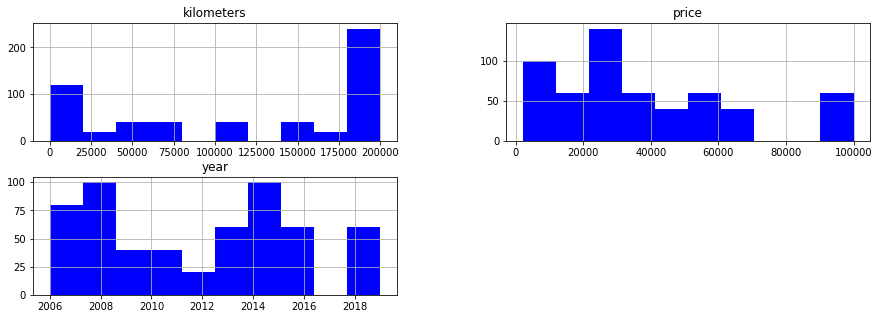

In [37]:
df.hist(figsize=(15,5), color = "b") #ploting count per price

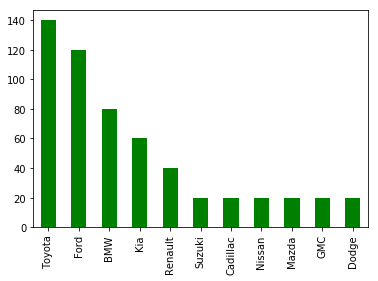

In [38]:
df.car_maker.value_counts().plot(kind = "bar", color = "g") #ploting count of cars per maker